In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.dates as mdates

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 2 Fundamental Concepts

## 0. Collection

In [5]:
winesSales = pd.read_csv("https://raw.githubusercontent.com/rajansharm/Time-Series-Analysis/refs/heads/master/AusWineSales.csv")
                         # index_col='YearMonth')
# winesSales.head(2)

winesSales.Red = pd.to_numeric(winesSales['Red'], errors='coerce').fillna(0)
winesSales.YearMonth = pd.to_datetime(winesSales.YearMonth)
winesSales.Sparkling = pd.to_numeric(winesSales.Sparkling)
winesSales.Sweetwhite = pd.to_numeric(winesSales.Sweetwhite)
winesSales['YearMonthNum'] = winesSales['YearMonth'].map(mdates.date2num)
winesSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   YearMonth     187 non-null    datetime64[ns]
 1   Red           187 non-null    int64         
 2   Sparkling     187 non-null    int64         
 3   Sweetwhite    187 non-null    int64         
 4   YearMonthNum  187 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 7.4 KB


## 1. Stochastic Processes

A **stochastic process** is a family of time indexed random variables $X(w, t)$, where $w$ belongs to a sample space ($\Omega$) and  $t$ belongs to an index set ($\mathbb{R}, \mathbb{Z}, \mathbb{C}$). 

For afixed $t$, $X(w, t)$ is a **random variable**. 

For a given $w$, $X(w, t)$, as a function of $t$, is called a **sample function** or **realization**. 

The population that consists of all possible realizations is called the **ensemble** in stochastic processes and time series analysis. 

Thus, a time series is a realization or sample function from a certain stochastic process. 

A complete probabilistic time model for the sequence of random variable ${X_1, X_2, ...}$ would specify all of the joint distribution of the random vectors $(X_1, ..., X_n)$:
$$\mathrm{P}(X_1\leq x_1, ..., X_n\leq x_n)$$

Such a specification is rarely used in time series analysis (unless the data are generated by some well-understood simple mechanism), since in general it will contain far too many parameters to be estimated from the available data.

The mean function of the process 
$$\mu_t = \mathbb{E}X_t$$

The variance function of the process 
$$\sigma_t^2 = \mathbb{E}(X_t-\mu_t)^2$$

The covariance function between $X_t$ and $X_s$ 
$$\gamma(t, s) = \mathbb{E}(X_t-\mu_t)(X_s-\mu_s)$$

The correlation function between $X_t$ and $X_s$ 
$$\rho(t, s) = \frac{\gamma(t, s)}{\sqrt{\sigma_t^2}\sqrt{\sigma_s^2}}$$

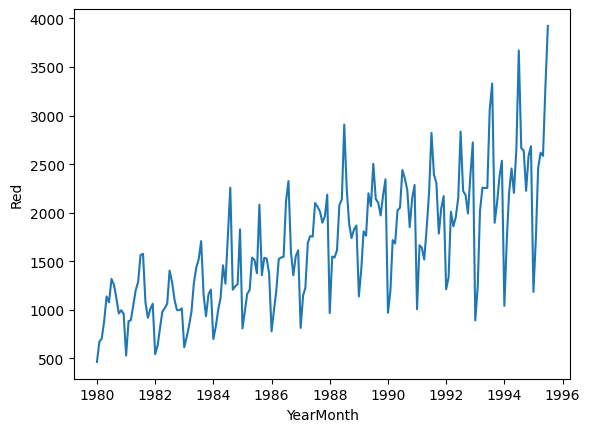

In [13]:
sns.lineplot(x='YearMonth', y='Red', data=winesSales)
plt.show()

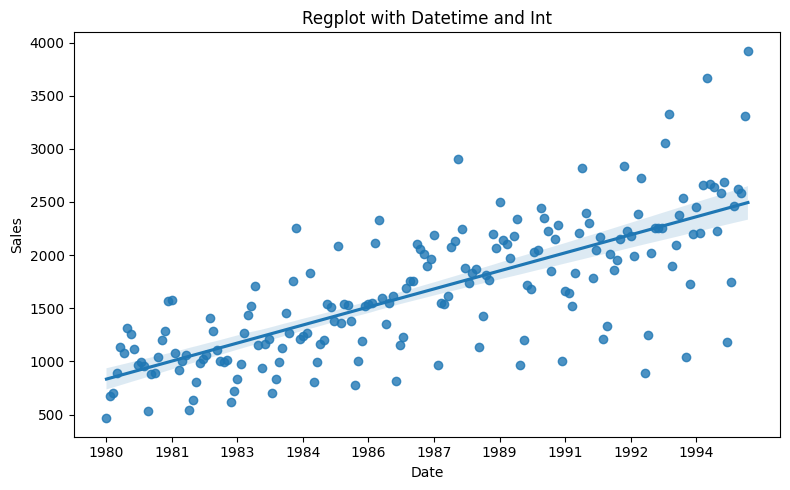

In [25]:
# Plotting
plt.figure(figsize=(8, 5))
sns.regplot(x='YearMonthNum', y='Red', data=winesSales)

# Formatting x-axis to show dates
plt.xticks(winesSales['YearMonthNum'], winesSales['YearMonth'].dt.strftime("%Y"))
plt.locator_params(axis='x', nbins=10)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Regplot with Datetime and Int')
plt.tight_layout()
plt.show()

## 2. The Autocovariance and Autocorrelation Functions